In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_parquet("train_df.parquet")

In [3]:
df

,protein_sequence,pH,data_source,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6


In [4]:
28981*28981

839898361

In [5]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), analyzer='char') 

In [7]:
vectorizer.fit(train_df["protein_sequence"])

TfidfVectorizer(analyzer='char')

In [8]:
transformed_df = vectorizer.transform(train_df["protein_sequence"])
transformed_df.toarray()

array([[0.18330111, 0.0341034 , 0.09169777, ..., 0.39750026, 0.03371527,
        0.21566511],
       [0.27996746, 0.        , 0.28011167, ..., 0.39484513, 0.05617689,
        0.14117102],
       [0.19623622, 0.05841599, 0.28796138, ..., 0.26187746, 0.02887558,
        0.17151388],
       ...,
       [0.23879784, 0.11178819, 0.15414248, ..., 0.30068622, 0.09351347,
        0.0932219 ],
       [0.3462348 , 0.12078266, 0.17753674, ..., 0.21225456, 0.02388161,
        0.061105  ],
       [0.35118727, 0.07000589, 0.23215397, ..., 0.30128131, 0.00692092,
        0.10751465]])

In [9]:
vectorizer.get_feature_names_out()

array(['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p',
       'q', 'r', 's', 't', 'v', 'w', 'y'], dtype=object)

In [10]:
train_df[vectorizer.get_feature_names_out()] = vectorizer.transform(train_df["protein_sequence"]).toarray()

In [19]:
test_df[vectorizer.get_feature_names_out()] = vectorizer.transform(test_df["protein_sequence"]).toarray()

In [11]:
train_df

,protein_sequence,pH,data_source,tm,a,c,d,e,f,g,...,m,n,p,q,r,s,t,v,w,y
seq_id,,,,,,,,,,,,,,,,,,,,,
12819,MINSPRVCIQVQSVYIEAQSSPDNERYVFAYTVTIRNLGRAPVQLL...,7.0,doi.org/10.1038/s41592-020-0801-4,46.6,0.183301,0.034103,0.091698,0.305612,0.091953,0.366546,...,0.092499,0.184314,0.276030,0.245537,0.214061,0.183499,0.245057,0.397500,0.033715,0.215665
2430,LDEKVDEMTGYQAEAKMTFRTGEKPQVYHVEVWHKQPSYYRVSLKN...,7.0,doi.org/10.1038/s41592-020-0801-4,78.9,0.279967,0.000000,0.280112,0.305529,0.191517,0.190857,...,0.154124,0.153553,0.178860,0.153419,0.101906,0.229312,0.318998,0.394845,0.056177,0.141171
6620,MATDNLISKIKNRESGIVLYGITPPKKGTSEEKITEISARQVDRLQ...,7.0,doi.org/10.1038/s41592-020-0801-4,36.9,0.196236,0.058416,0.287961,0.301004,0.144382,0.209286,...,0.066018,0.157856,0.157605,0.197148,0.170238,0.379801,0.183645,0.261877,0.028876,0.171514
11376,MGIGSKILENNIQKSISLGFYHSHSELRKSFYEFFKSKNHEILRSS...,7.0,doi.org/10.1038/s41592-020-0801-4,36.2,0.255391,0.079826,0.265743,0.327018,0.194738,0.301314,...,0.087637,0.148945,0.097429,0.148815,0.286318,0.317027,0.184374,0.265839,0.045096,0.092720
24093,MSIDRTSPLKPVSTVQPRETTDAPVTNSRAAKTTASTSTSVTLSDA...,7.0,doi.org/10.1038/s41592-020-0801-4,61.5,0.408117,0.000000,0.259845,0.185575,0.000000,0.111288,...,0.112335,0.149226,0.186235,0.223644,0.185689,0.408559,0.409212,0.185670,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23736,MSFNAFASSLSKKLQEISTSVSEKTQELPSLAQSTQRMVQERLGQV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.3,0.360541,0.038949,0.174545,0.430478,0.151694,0.069771,...,0.082166,0.198808,0.140111,0.245372,0.139701,0.360931,0.233231,0.197889,0.000000,0.105561
5615,MANWLVLAEQVLGGHELTDEEALAILDCPDEELLLLLQGAYRIRSA...,7.0,doi.org/10.1038/s41592-020-0801-4,73.8,0.380848,0.119572,0.202430,0.297645,0.071645,0.297491,...,0.084082,0.179509,0.167274,0.107611,0.226350,0.202544,0.214801,0.285886,0.013135,0.156032
885,DLEAVAIGEVHDNVTLRCGSASGSRGLVTWYRNDSEPAFLVSFNSS...,7.0,doi.org/10.1038/s41592-020-0801-4,52.9,0.238798,0.111788,0.154142,0.354473,0.115929,0.346588,...,0.054421,0.209134,0.239734,0.201213,0.138793,0.354729,0.247162,0.300686,0.093513,0.093222


In [12]:
sample_df = train_df.sample(1000)
sample_df

,protein_sequence,pH,data_source,tm,a,c,d,e,f,g,...,m,n,p,q,r,s,t,v,w,y
seq_id,,,,,,,,,,,,,,,,,,,,,
23690,MSFELPALPYAKDALAPHISAETIEYHYGKHHQTYVTNLNNLIKGT...,7.0,doi.org/10.1038/s41592-020-0801-4,64.9,0.521122,0.022374,0.140374,0.240605,0.221203,0.280561,...,0.020229,0.282155,0.160974,0.060409,0.060188,0.220713,0.281357,0.200607,0.154838,0.181918
11341,MGGVTSKVNVDVVQEQVKKDPVVMYTKTSCTFCNRAKDLFSDVRVA...,7.0,doi.org/10.1038/s41592-020-0801-4,51.5,0.198317,0.147589,0.264559,0.165324,0.165810,0.297430,...,0.066718,0.199413,0.132730,0.199239,0.165426,0.231621,0.331415,0.496228,0.000000,0.166666
6734,MATLDGINVKDIVKVERTSVHSHITGLGLNDRLEAEYVSGGMVGQV...,7.0,doi.org/10.1038/s41592-020-0801-4,42.2,0.311589,0.057972,0.233812,0.346335,0.104206,0.302887,...,0.104825,0.095734,0.095581,0.104346,0.233921,0.225280,0.242997,0.311862,0.009552,0.069829
18052,MNAVIVDAKRTIFGNQNGLLKPFLPEDLAAPIIRCLSRKLEDQVDE...,7.0,doi.org/10.1038/s41592-020-0801-4,44.6,0.512956,0.068714,0.184759,0.236045,0.144102,0.359014,...,0.062125,0.103158,0.205987,0.113375,0.225922,0.277296,0.133726,0.225898,0.000000,0.093115
11297,MGGAVSAGEDNDDLIDNLKEAQYIRTERVEQAFRAIDRGDYYLEGY...,7.0,doi.org/10.1038/s41592-020-0801-4,49.7,0.239166,0.063567,0.262079,0.364575,0.137117,0.273290,...,0.114943,0.217584,0.217237,0.194510,0.228000,0.216622,0.114194,0.205179,0.025138,0.172282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20387,MPKRGKKYLEALKLVDRSKAYPIAEAIELVKKTNIAKFDATVEVAF...,7.0,doi.org/10.1038/s41592-020-0801-4,71.5,0.471894,0.000000,0.197993,0.213190,0.122181,0.319621,...,0.076817,0.107146,0.183385,0.076466,0.106661,0.060955,0.198422,0.426600,0.016799,0.107460
28748,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,58.7,0.293450,0.084928,0.217482,0.163086,0.152662,0.239070,...,0.054846,0.163929,0.261867,0.120109,0.152308,0.413450,0.359623,0.315463,0.047978,0.197293
17816,MMSFVSLLLVGILFHATQAEQLTKCEVFRELKDLKGYGGVSLPEWV...,7.4,10.1093/protein/12.7.581,51.7,0.165739,0.246688,0.359287,0.193432,0.166286,0.193333,...,0.083637,0.222207,0.055463,0.194261,0.027650,0.248878,0.221578,0.193532,0.121940,0.111430


In [14]:
train_pairs = sample_df.merge(sample_df, how='cross', suffixes=('_l', '_r'))

In [20]:
sample_test_df = test_df.sample(1000)
sample_test_df

,protein_sequence,pH,data_source,tm,a,c,d,e,f,g,...,m,n,p,q,r,s,t,v,w,y
seq_id,,,,,,,,,,,,,,,,,,,,,
732,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.119389,0.276473,0.182951,0.157387,0.224018,0.300856,0.282102,0.191996,0.059982,0.119297
20933,MPVRTECPPPAGASTTSAASLIPPPPINTQQPGVATSLLYSGSKFR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.0,0.245943,0.063357,0.227141,0.264957,0.265736,0.264821,...,0.038188,0.114139,0.265900,0.152053,0.113623,0.378783,0.246603,0.189353,0.083515,0.305267
7231,MCSAGGIRRPIQIEEFKTAISGMSDMELAQIKTEIENSINHLQRSN...,7.0,doi.org/10.1038/s41592-020-0801-4,53.3,0.255531,0.028525,0.409060,0.383435,0.051275,0.229942,...,0.103159,0.334026,0.076960,0.102687,0.204625,0.281388,0.153730,0.230179,0.000000,0.103079
22176,MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...,7.0,10.1006/jmbi.1995.0323,78.6,0.577820,0.103204,0.138748,0.115606,0.069567,0.346638,...,0.069981,0.092962,0.348052,0.023220,0.138813,0.323929,0.208573,0.346996,0.025507,0.069926
11609,MGLPDRWLHCPKTGTLINNLFFPFKTPLCKMYDNQIAERRYQFHPA...,7.0,doi.org/10.1038/s41592-020-0801-4,33.0,0.167212,0.081157,0.276406,0.305454,0.218823,0.283490,...,0.154086,0.248549,0.197063,0.160685,0.203762,0.138281,0.233267,0.232847,0.056163,0.168631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,MNDIAHNLAQVRDKISAAATRCGRSPEEITLLAVSKTKPASAIAEA...,7.0,doi.org/10.1038/s41592-020-0801-4,64.5,0.510046,0.036733,0.214001,0.279804,0.115552,0.230308,...,0.099633,0.132352,0.165176,0.181825,0.296446,0.230593,0.164972,0.197610,0.036315,0.066371
14245,MKIRFCNGFTKPGFLLVHFEPPSFFAVRSRSLSDSTYGNLCNHKKR...,7.0,doi.org/10.1038/s41592-020-0801-4,44.1,0.137889,0.072913,0.261398,0.319437,0.182032,0.232198,...,0.109868,0.109461,0.233145,0.102074,0.290577,0.319668,0.152812,0.261492,0.008009,0.117102
6953,MAVAALKALLPPERLRRLTPLGGFEARVYTDGERVYKVYRKEEAHL...,7.0,doi.org/10.1038/s41592-020-0801-4,91.3,0.479410,0.013379,0.119914,0.299739,0.204422,0.251651,...,0.036289,0.012051,0.216580,0.072246,0.371906,0.083988,0.108156,0.191932,0.039681,0.072521


In [21]:
test_pairs = sample_test_df.merge(sample_test_df, how='cross', suffixes=('_l', '_r'))

In [22]:
test_pairs

,protein_sequence_l,pH_l,data_source_l,tm_l,a_l,c_l,d_l,e_l,f_l,g_l,...,m_r,n_r,p_r,q_r,r_r,s_r,t_r,v_r,w_r,y_r
0,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.119389,0.276473,0.182951,0.157387,0.224018,0.300856,0.282102,0.191996,0.059982,0.119297
1,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.038188,0.114139,0.265900,0.152053,0.113623,0.378783,0.246603,0.189353,0.083515,0.305267
2,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.103159,0.334026,0.076960,0.102687,0.204625,0.281388,0.153730,0.230179,0.000000,0.103079
3,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.069981,0.092962,0.348052,0.023220,0.138813,0.323929,0.208573,0.346996,0.025507,0.069926
4,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.154086,0.248549,0.197063,0.160685,0.203762,0.138281,0.233267,0.232847,0.056163,0.168631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.099633,0.132352,0.165176,0.181825,0.296446,0.230593,0.164972,0.197610,0.036315,0.066371
999996,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.109868,0.109461,0.233145,0.102074,0.290577,0.319668,0.152812,0.261492,0.008009,0.117102
999997,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.036289,0.012051,0.216580,0.072246,0.371906,0.083988,0.108156,0.191932,0.039681,0.072521
999998,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.057187,0.193716,0.125146,0.102466,0.124779,0.363031,0.215894,0.272217,0.037520,0.182857


In [31]:
train_pairs["length_l"] = train_pairs["protein_sequence_l"].str.len()

In [32]:
train_pairs["length_r"] = train_pairs["protein_sequence_r"].str.len()

In [29]:
test_pairs["length_l"] = test_pairs["protein_sequence_l"].str.len()

In [30]:
test_pairs["length_r"] = test_pairs["protein_sequence_r"].str.len()

In [36]:
train_pairs[train_pairs["protein_sequence_l"] == train_pairs["protein_sequence_r"]]

,protein_sequence_l,pH_l,data_source_l,tm_l,a_l,c_l,d_l,e_l,f_l,g_l,...,q_r,r_r,s_r,t_r,v_r,w_r,y_r,delta_tm,length_l,length_r
0,MSFELPALPYAKDALAPHISAETIEYHYGKHHQTYVTNLNNLIKGT...,7.0,doi.org/10.1038/s41592-020-0801-4,64.9,0.521122,0.022374,0.140374,0.240605,0.221203,0.280561,...,0.060409,0.060188,0.220713,0.281357,0.200607,0.154838,0.181918,0.0,192,192
1001,MGGVTSKVNVDVVQEQVKKDPVVMYTKTSCTFCNRAKDLFSDVRVA...,7.0,doi.org/10.1038/s41592-020-0801-4,51.5,0.198317,0.147589,0.264559,0.165324,0.165810,0.297430,...,0.199239,0.165426,0.231621,0.331415,0.496228,0.000000,0.166666,0.0,118,118
2002,MATLDGINVKDIVKVERTSVHSHITGLGLNDRLEAEYVSGGMVGQV...,7.0,doi.org/10.1038/s41592-020-0801-4,42.2,0.311589,0.057972,0.233812,0.346335,0.104206,0.302887,...,0.104346,0.233921,0.225280,0.242997,0.311862,0.009552,0.069829,0.0,447,447
3003,MNAVIVDAKRTIFGNQNGLLKPFLPEDLAAPIIRCLSRKLEDQVDE...,7.0,doi.org/10.1038/s41592-020-0801-4,44.6,0.512956,0.068714,0.184759,0.236045,0.144102,0.359014,...,0.113375,0.225922,0.277296,0.133726,0.225898,0.000000,0.093115,0.0,363,363
4004,MGGAVSAGEDNDDLIDNLKEAQYIRTERVEQAFRAIDRGDYYLEGY...,7.0,doi.org/10.1038/s41592-020-0801-4,49.7,0.239166,0.063567,0.262079,0.364575,0.137117,0.273290,...,0.194510,0.228000,0.216622,0.114194,0.205179,0.025138,0.172282,0.0,356,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995995,MPKRGKKYLEALKLVDRSKAYPIAEAIELVKKTNIAKFDATVEVAF...,7.0,doi.org/10.1038/s41592-020-0801-4,71.5,0.471894,0.000000,0.197993,0.213190,0.122181,0.319621,...,0.076466,0.106661,0.060955,0.198422,0.426600,0.016799,0.107460,0.0,232,232
996996,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,58.7,0.293450,0.084928,0.217482,0.163086,0.152662,0.239070,...,0.120109,0.152308,0.413450,0.359623,0.315463,0.047978,0.197293,0.0,363,363
997997,MMSFVSLLLVGILFHATQAEQLTKCEVFRELKDLKGYGGVSLPEWV...,7.4,10.1093/protein/12.7.581,51.7,0.165739,0.246688,0.359287,0.193432,0.166286,0.193333,...,0.194261,0.027650,0.248878,0.221578,0.193532,0.121940,0.111430,0.0,142,142
998998,MMKHPQDLSVTDDQQLMKVNKVEKMEQELHDPESESHIMHADALAS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.4,0.334803,0.099665,0.200985,0.212119,0.083977,0.284539,...,0.280299,0.201079,0.446887,0.128685,0.167548,0.012316,0.073156,0.0,703,703


In [38]:
train_pairs.drop(index=train_pairs[train_pairs["protein_sequence_l"] == train_pairs["protein_sequence_r"]].index, inplace=True)

In [41]:
train_pairs.dropna(inplace=True)

In [44]:
test_pairs.drop(index=test_pairs[test_pairs["protein_sequence_l"] == test_pairs["protein_sequence_r"]].index, inplace=True)

In [45]:
test_pairs.dropna(inplace=True)

In [24]:
train_pairs["delta_tm"] = train_pairs["tm_l"] - train_pairs["tm_r"]

<AxesSubplot: ylabel='Frequency'>

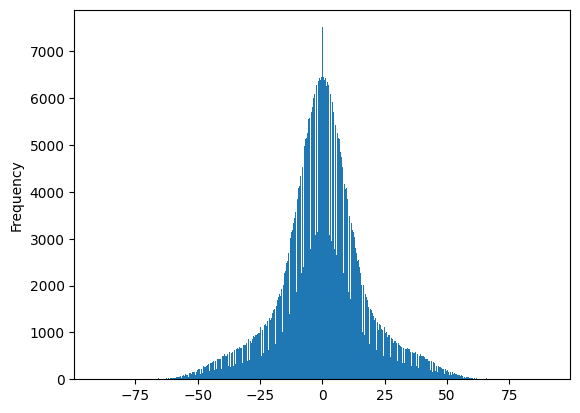

In [27]:
train_pairs["delta_tm"].plot(kind="hist", bins=1000)

In [49]:
test_pairs["delta_tm"] = test_pairs["tm_l"] - test_pairs["tm_r"]

In [50]:
test_pairs

,protein_sequence_l,pH_l,data_source_l,tm_l,a_l,c_l,d_l,e_l,f_l,g_l,...,q_r,r_r,s_r,t_r,v_r,w_r,y_r,length_l,length_r,delta_tm
1,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.152053,0.113623,0.378783,0.246603,0.189353,0.083515,0.305267,1311,216,-5.1
2,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.102687,0.204625,0.281388,0.153730,0.230179,0.000000,0.103079,1311,149,-8.4
3,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.023220,0.138813,0.323929,0.208573,0.346996,0.025507,0.069926,1311,144,-33.7
4,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.160685,0.203762,0.138281,0.233267,0.232847,0.056163,0.168631,1311,572,11.9
5,CPSECRCAGLDVHCEGKNLTAIPGHIPIATTNLYFSNNLLNSLSKS...,7.0,doi.org/10.1038/s41592-020-0801-4,44.9,0.233391,0.135621,0.243107,0.284648,0.195669,0.217372,...,0.181879,0.362431,0.181234,0.155592,0.336509,0.142710,0.130410,1311,148,-11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.140604,0.203570,0.556043,0.267502,0.144454,0.026547,0.119088,448,1752,1.9
999995,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.181825,0.296446,0.230593,0.164972,0.197610,0.036315,0.066371,448,233,-13.5
999996,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.102074,0.290577,0.319668,0.152812,0.261492,0.008009,0.117102,448,540,6.9
999997,MSAPAQNYKIADISLAAFGRKEIELAEHEMPGLMAIRKAYGDVQPL...,7.0,doi.org/10.1038/s41592-020-0801-4,51.0,0.400817,0.109373,0.204968,0.285129,0.151920,0.329510,...,0.072246,0.371906,0.083988,0.108156,0.191932,0.039681,0.072521,448,278,-40.3


In [51]:
train_pairs.to_parquet("train_pairs_df.parquet")
test_pairs.to_parquet("test_pairs_df")

In [52]:
feature_names = vectorizer.get_feature_names_out()
feature_names_with_suffix = [fn + "_l" for fn in feature_names] + [fn + "_r" for fn in feature_names]
remaining_feats = ["length_l", "length_r", "pH_l", "pH_r"]
feature_names = feature_names_with_suffix + remaining_feats
feature_names

['a_l',
 'c_l',
 'd_l',
 'e_l',
 'f_l',
 'g_l',
 'h_l',
 'i_l',
 'k_l',
 'l_l',
 'm_l',
 'n_l',
 'p_l',
 'q_l',
 'r_l',
 's_l',
 't_l',
 'v_l',
 'w_l',
 'y_l',
 'a_r',
 'c_r',
 'd_r',
 'e_r',
 'f_r',
 'g_r',
 'h_r',
 'i_r',
 'k_r',
 'l_r',
 'm_r',
 'n_r',
 'p_r',
 'q_r',
 'r_r',
 's_r',
 't_r',
 'v_r',
 'w_r',
 'y_r',
 'length_l',
 'length_r',
 'pH_l',
 'pH_r']

In [53]:
X_train = train_pairs[feature_names]

In [54]:
y_train = train_pairs["delta_tm"]

In [55]:
X_test = test_pairs[feature_names]

In [56]:
y_test = test_pairs["delta_tm"]

In [57]:
import lightgbm as lgb

In [60]:
from scipy.stats import spearmanr
lgb_regressor = lgb.LGBMRegressor()
lgb_regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
y_pred = lgb_regressor.predict(X_test)
round(spearmanr(y_test, y_pred).correlation, 5)

[1]	valid_0's l2: 269.629
[2]	valid_0's l2: 251.281
[3]	valid_0's l2: 235.528
[4]	valid_0's l2: 222.295
[5]	valid_0's l2: 211.606
[6]	valid_0's l2: 201.36
[7]	valid_0's l2: 194.111
[8]	valid_0's l2: 186.646
[9]	valid_0's l2: 180.453
[10]	valid_0's l2: 175.842
[11]	valid_0's l2: 171.883
[12]	valid_0's l2: 167.885
[13]	valid_0's l2: 164.947
[14]	valid_0's l2: 162.401
[15]	valid_0's l2: 160.062
[16]	valid_0's l2: 158.315
[17]	valid_0's l2: 156.08
[18]	valid_0's l2: 155.301
[19]	valid_0's l2: 153.894
[20]	valid_0's l2: 152.5
[21]	valid_0's l2: 150.715
[22]	valid_0's l2: 149.374
[23]	valid_0's l2: 147.678
[24]	valid_0's l2: 146.698
[25]	valid_0's l2: 146.339
[26]	valid_0's l2: 145.262
[27]	valid_0's l2: 144.755
[28]	valid_0's l2: 144.449
[29]	valid_0's l2: 143.787
[30]	valid_0's l2: 143.061
[31]	valid_0's l2: 142.811
[32]	valid_0's l2: 142.703
[33]	valid_0's l2: 142.042
[34]	valid_0's l2: 141.867
[35]	valid_0's l2: 141.28
[36]	valid_0's l2: 140.528
[37]	valid_0's l2: 139.87
[38]	valid_0's l

0.59773

In [61]:
test_pairs["delta_tm"].describe()

count    9.129740e+05
mean     9.164939e-17
std      1.714876e+01
min     -6.950000e+01
25%     -8.900000e+00
50%      0.000000e+00
75%      8.900000e+00
max      6.950000e+01
Name: delta_tm, dtype: float64

In [62]:
competition_df = pd.read_csv("novozymes-enzyme-stability-prediction/test.csv")

In [64]:
competition_df[vectorizer.get_feature_names_out()] = vectorizer.transform(competition_df["protein_sequence"]).toarray()

In [65]:
competition_df

,seq_id,protein_sequence,pH,data_source,a,c,d,e,f,g,...,m,n,p,q,r,s,t,v,w,y
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.374730,0.076057,0.255629,0.136315,0.170894,0.323580,...,0.0,0.325419,0.290700,0.222460,0.051150,0.306929,0.136631,0.221625,0.112787,0.103066
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.372873,0.075680,0.254363,0.118684,0.170047,0.321977,...,0.0,0.323806,0.289259,0.221358,0.050896,0.305408,0.135954,0.220527,0.112228,0.102555
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,0.375549,0.076223,0.256188,0.119536,0.171267,0.324287,...,0.0,0.326130,0.291335,0.222946,0.051261,0.307599,0.136929,0.222109,0.113034,0.103291
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.376383,0.095491,0.256757,0.119801,0.171648,0.325008,...,0.0,0.326854,0.291982,0.223442,0.051375,0.308283,0.137234,0.222603,0.113285,0.103521
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.375838,0.076282,0.256385,0.119628,0.188539,0.324537,...,0.0,0.326381,0.291559,0.223118,0.051301,0.307836,0.137035,0.222281,0.113121,0.103371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358943,0.076322,0.256520,0.119691,0.171490,0.324708,...,0.0,0.326552,0.291712,0.223235,0.051328,0.307998,0.137107,0.222397,0.113180,0.103425
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358427,0.076212,0.256151,0.119519,0.171243,0.324241,...,0.0,0.326083,0.291293,0.222914,0.051254,0.307556,0.136910,0.222078,0.113017,0.103276
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357572,0.076030,0.255540,0.119234,0.170834,0.323467,...,0.0,0.342426,0.290598,0.222382,0.051132,0.306822,0.136583,0.221548,0.112748,0.103030
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357787,0.076076,0.255694,0.119305,0.170937,0.323662,...,0.0,0.325501,0.307878,0.222516,0.051163,0.307007,0.136665,0.221681,0.112816,0.103092


In [66]:
competition_df["protein_sequence_l"] = "VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK"

In [67]:
competition_df["pH_l"] = 8

In [68]:
competition_df["protein_sequence_r"] = competition_df["protein_sequence"]

In [69]:
competition_df["pH_r"] = competition_df["pH"]

In [74]:
left = [fn + "_l" for fn in vectorizer.get_feature_names_out()]
right = [fn + "_r" for fn in vectorizer.get_feature_names_out()]

In [75]:
competition_df[left] = vectorizer.transform(competition_df["protein_sequence_l"]).toarray()
competition_df[right] = vectorizer.transform(competition_df["protein_sequence_r"]).toarray()
competition_df

,seq_id,protein_sequence,pH,data_source,a,c,d,e,f,g,...,m_r,n_r,p_r,q_r,r_r,s_r,t_r,v_r,w_r,y_r
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.374730,0.076057,0.255629,0.136315,0.170894,0.323580,...,0.0,0.325419,0.290700,0.222460,0.051150,0.306929,0.136631,0.221625,0.112787,0.103066
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.372873,0.075680,0.254363,0.118684,0.170047,0.321977,...,0.0,0.323806,0.289259,0.221358,0.050896,0.305408,0.135954,0.220527,0.112228,0.102555
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,0.375549,0.076223,0.256188,0.119536,0.171267,0.324287,...,0.0,0.326130,0.291335,0.222946,0.051261,0.307599,0.136929,0.222109,0.113034,0.103291
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.376383,0.095491,0.256757,0.119801,0.171648,0.325008,...,0.0,0.326854,0.291982,0.223442,0.051375,0.308283,0.137234,0.222603,0.113285,0.103521
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.375838,0.076282,0.256385,0.119628,0.188539,0.324537,...,0.0,0.326381,0.291559,0.223118,0.051301,0.307836,0.137035,0.222281,0.113121,0.103371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358943,0.076322,0.256520,0.119691,0.171490,0.324708,...,0.0,0.326552,0.291712,0.223235,0.051328,0.307998,0.137107,0.222397,0.113180,0.103425
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358427,0.076212,0.256151,0.119519,0.171243,0.324241,...,0.0,0.326083,0.291293,0.222914,0.051254,0.307556,0.136910,0.222078,0.113017,0.103276
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357572,0.076030,0.255540,0.119234,0.170834,0.323467,...,0.0,0.342426,0.290598,0.222382,0.051132,0.306822,0.136583,0.221548,0.112748,0.103030
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357787,0.076076,0.255694,0.119305,0.170937,0.323662,...,0.0,0.325501,0.307878,0.222516,0.051163,0.307007,0.136665,0.221681,0.112816,0.103092


In [76]:
competition_df["length_l"] = competition_df["protein_sequence_l"].str.len()
competition_df["length_r"] = competition_df["protein_sequence_r"].str.len()
competition_df

,seq_id,protein_sequence,pH,data_source,a,c,d,e,f,g,...,p_r,q_r,r_r,s_r,t_r,v_r,w_r,y_r,length_l,length_r
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.374730,0.076057,0.255629,0.136315,0.170894,0.323580,...,0.290700,0.222460,0.051150,0.306929,0.136631,0.221625,0.112787,0.103066,221,221
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.372873,0.075680,0.254363,0.118684,0.170047,0.321977,...,0.289259,0.221358,0.050896,0.305408,0.135954,0.220527,0.112228,0.102555,221,221
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,0.375549,0.076223,0.256188,0.119536,0.171267,0.324287,...,0.291335,0.222946,0.051261,0.307599,0.136929,0.222109,0.113034,0.103291,221,220
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.376383,0.095491,0.256757,0.119801,0.171648,0.325008,...,0.291982,0.223442,0.051375,0.308283,0.137234,0.222603,0.113285,0.103521,221,221
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.375838,0.076282,0.256385,0.119628,0.188539,0.324537,...,0.291559,0.223118,0.051301,0.307836,0.137035,0.222281,0.113121,0.103371,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358943,0.076322,0.256520,0.119691,0.171490,0.324708,...,0.291712,0.223235,0.051328,0.307998,0.137107,0.222397,0.113180,0.103425,221,221
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.358427,0.076212,0.256151,0.119519,0.171243,0.324241,...,0.291293,0.222914,0.051254,0.307556,0.136910,0.222078,0.113017,0.103276,221,221
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357572,0.076030,0.255540,0.119234,0.170834,0.323467,...,0.290598,0.222382,0.051132,0.306822,0.136583,0.221548,0.112748,0.103030,221,221
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,0.357787,0.076076,0.255694,0.119305,0.170937,0.323662,...,0.307878,0.222516,0.051163,0.307007,0.136665,0.221681,0.112816,0.103092,221,221


In [79]:
competition_df["y_pred"] = lgb_regressor.predict(competition_df[feature_names])

In [80]:
competition_df["y_pred"].describe()

count    2413.000000
mean       -1.917307
std         1.093386
min        -6.481260
25%        -2.040320
50%        -2.040320
75%        -1.663826
max         1.031775
Name: y_pred, dtype: float64

<AxesSubplot: ylabel='Frequency'>

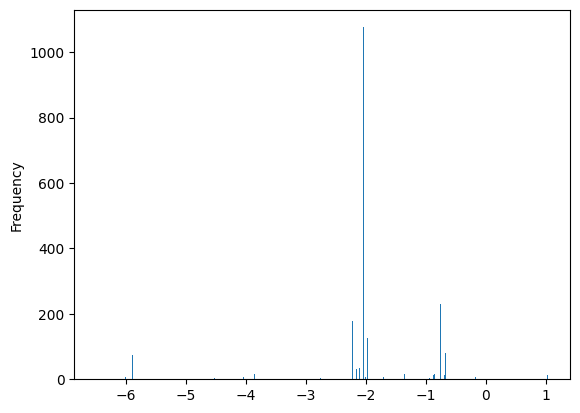

In [83]:
competition_df["y_pred"].plot(kind="hist", bins=1000)

In [86]:
len(competition_df["y_pred"].value_counts())

60

In [87]:
competition_df[right].value_counts()

a_r       c_r       d_r       e_r       f_r       g_r       h_r  i_r       k_r       l_r       m_r  n_r       p_r       q_r       r_r       s_r       t_r       v_r       w_r       y_r     
0.376383  0.095491  0.256757  0.119801  0.171648  0.325008  0.0  0.103159  0.395197  0.188143  0.0  0.326854  0.291982  0.223442  0.051375  0.308283  0.137234  0.222603  0.113285  0.103521    19
0.375514  0.076216  0.256164  0.119525  0.171252  0.324258  0.0  0.102921  0.394285  0.187709  0.0  0.326100  0.291308  0.222926  0.051257  0.307571  0.136917  0.239173  0.113023  0.103282    18
0.376278  0.076371  0.256685  0.119768  0.171600  0.324917  0.0  0.120318  0.395087  0.188091  0.0  0.326763  0.291900  0.223379  0.051361  0.308197  0.137195  0.222541  0.113253  0.103492    18
0.358524  0.076233  0.256220  0.119551  0.188418  0.324328  0.0  0.102943  0.411518  0.187750  0.0  0.326171  0.291372  0.222974  0.051268  0.307639  0.136947  0.222138  0.113048  0.103304    17
0.376615  0.076440  0.256915  0